In [1]:
import sys
sys.path.append('..')
%matplotlib inline

import numpy as np
from sklearn.metrics import matthews_corrcoef
from korr import mcc, flatten, corr_vs_pval, corrgram

## Actual vs Prediction

### Test 1 - Small Data
* sklearn's `matthews_corrcoef` returns a metric for one pair of variables
* korr's `mcc` has more overhead as it returns a matrix for potentially `n*(n-1)/2` correlation pairs

In [2]:
np.random.seed(43)
y_true = (np.random.normal(size=(100,2)) > 0).astype(int)
y_pred = y_true[:, 0]
y_true = y_true[:, 1]

In [3]:
%%time
r = matthews_corrcoef(y_true, y_pred)  # sklearn
print(r)

-0.05925926994729419
CPU times: user 3.27 ms, sys: 399 µs, total: 3.67 ms
Wall time: 3.82 ms


In [4]:
%%time
r, _ = mcc(np.c_[y_true, y_pred])
print(r)

[[ 1.         -0.05925927]
 [-0.05925927  1.        ]]
CPU times: user 2.84 ms, sys: 1.1 ms, total: 3.94 ms
Wall time: 4.22 ms


### Test 2 - Medium Size Data
This looks similar to sklearn's `confusion_matrix` vs `korr.confusion`, i.e. sklearn's `confusion_matrix` seems to slow down `matthews_corrcoef` as well.

In [5]:
np.random.seed(43)
y_true = (np.random.normal(size=(50000,2)) > 0).astype(int)
y_pred = y_true[:, 0]
y_true = y_true[:, 1]

In [6]:
%%time
r = matthews_corrcoef(y_true, y_pred)  # sklearn
print(r)

-0.00963619535336387
CPU times: user 86.3 ms, sys: 7.29 ms, total: 93.6 ms
Wall time: 156 ms


In [7]:
%%time
r, _ = mcc(np.c_[y_true, y_pred])
print(r)

[[ 1.        -0.0096362]
 [-0.0096362  1.       ]]
CPU times: user 4.62 ms, sys: 1.93 ms, total: 6.55 ms
Wall time: 7.77 ms


### Test 3 - Millions of Obs

In [8]:
np.random.seed(43)
y_true = (np.random.normal(size=(10000000,2)) > 0).astype(int)
y_pred = y_true[:, 0]
y_true = y_true[:, 1]

In [9]:
%%time
r = matthews_corrcoef(y_true, y_pred)  # sklearn
print(r)

0.0003776687195407562
CPU times: user 16 s, sys: 1.25 s, total: 17.3 s
Wall time: 18.6 s


In [10]:
%%time
r, _ = mcc(np.c_[y_true, y_pred])
print(r)

[[1.0000000e+00 3.7766872e-04]
 [3.7766872e-04 1.0000000e+00]]
CPU times: user 485 ms, sys: 138 ms, total: 624 ms
Wall time: 700 ms


## Correlation Analysis (EDA)

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import minmax_scale
X = (minmax_scale(load_breast_cancer().data, axis=0) > 0.5).astype(int)

Compute Matthews correlation for all variable pairs

In [12]:
r, pval = mcc(X)

The highest absolute Matthew correlations

In [13]:
flatten(r, pval, sortby="cor").head(10)

i   j       cor  pval
282  12  13  1.000000   0.0
1     0   2  0.976025   0.0
391  20  22  0.908899   0.0
74    2  20  0.834104   0.0
247  10  13  0.815776   0.0
246  10  12  0.815776   0.0
19    0  20  0.813346   0.0
76    2  22  0.771654   0.0
21    0  22  0.752464   0.0
103   3  23  0.708857   0.0

There are few negative correlations that are insignificant and have values around zero.

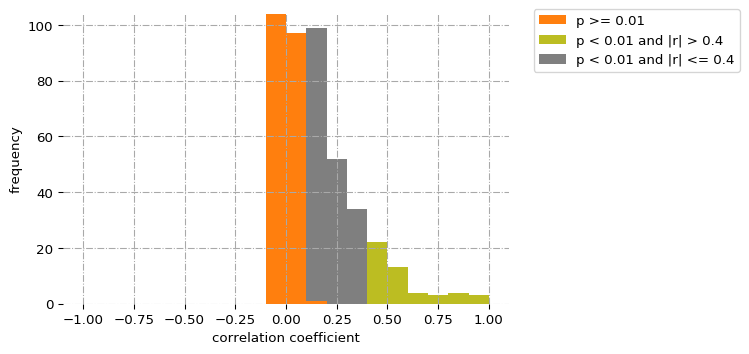

In [14]:
corr_vs_pval(r, pval);

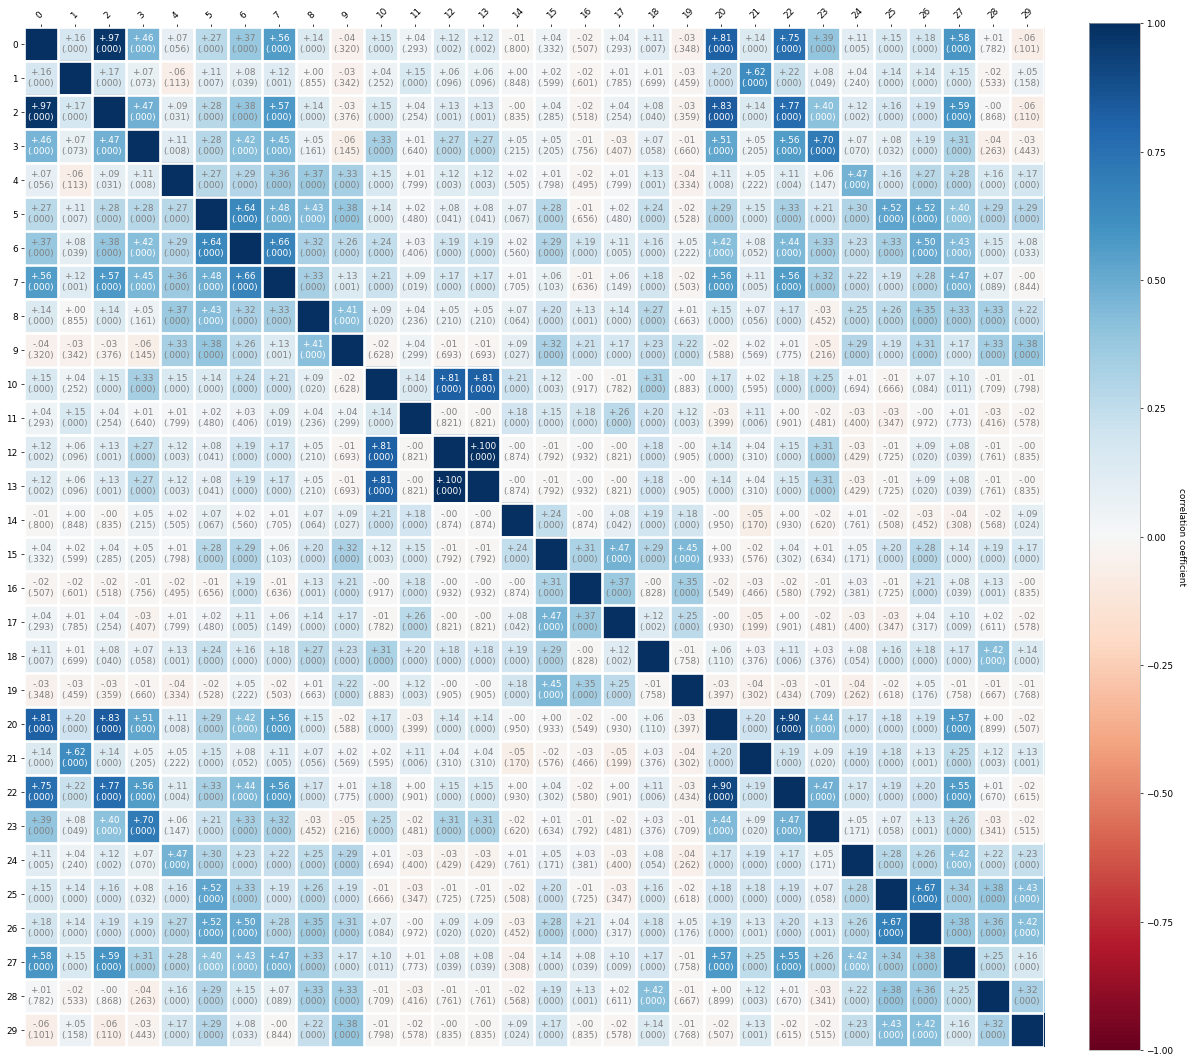

In [15]:
corrgram(r, pval, dpi=64);